In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import pickle

from ds import Datas

In [3]:
import matplotlib as matp

matp.rcParams['mathtext.fontset'] = 'stix'
matp.rcParams['font.family'] = 'STIXGeneral'
#matp.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
M_strategies = [r"$M_{SDP}$", r"$M_{l_1}$"]

In [4]:
# LOAD Datas()
file = open("../../data/PO_norm_big_greedy.txt", "rb")
data = pickle.load(file)
file.close()

print(np.shape(data.is_optimum)) # [n_bvars, n_instances, n_Mstrategies]
print(data.M_strategies)

M_strategies = ["$M_{SDP}$", "$M_{\ell_1}$"]
plot_M = [1,1]

def statistics_M(M):
    avg = np.mean(M[:,:,:], axis = 1)
    std = np.std(M[:,:,:], axis = 1)
    return avg, std

avg_M, std_M = statistics_M(data.M)

(11, 100, 2)
['heuristic_PO_M', 'qiskit_M']


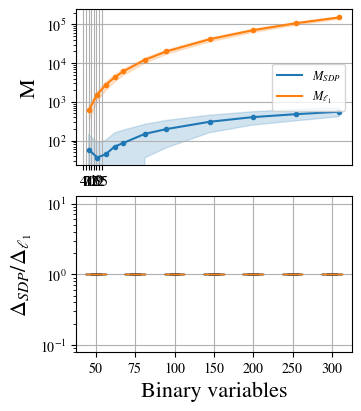

In [5]:
figure, axis = plt.subplots(2, 1, figsize=(3.5, 4), constrained_layout=True)
  
# Top plot
#axis[0].set_xlabel('Binary variables', fontsize = 16)
axis[0].set_ylabel('M', fontsize = 16)
#axis[0].set_title("M(n)")
for i in range(len(M_strategies)):
    if plot_M[i]:
        axis[0].plot(data.bvars, avg_M[:,i], color = colors[i], label=M_strategies[i])
        axis[0].plot(data.bvars, avg_M[:,i], ".", color = colors[i])
        axis[0].fill_between(data.bvars, avg_M[:,i] - std_M[:,i], avg_M[:,i] + std_M[:,i],
         color = colors[i], alpha=.2)
axis[0].grid()
axis[0].set_yscale("log")
#axis[0].set_xscale("log")
axis[0].set_xticks(np.arange(4, 26, 3))
axis[0].legend(fontsize = 9, loc='best')
  
# Bottom plot
indexes_to_plot = list(np.arange(-7, 0))   # PO_part3_ra10_mult4
#indexes_to_plot = list(np.arange(1, 20, 3)) # SPP_p25
#indexes_to_plot = list(np.arange(0, 24,3)) # NN_deg5
#axis[1].set_title('Gaps ratio', fontsize = 16)
axis[1].set_xlabel('Binary variables', fontsize = 16)
axis[1].set_ylabel(r'$\Delta_{SDP} / \Delta_{\ell_1}$', fontsize = 16)
#axis[1].set_ylabel(r'$\tilde{\Delta} / \Delta_{\ell_1}$', fontsize = 16)
axis[1].boxplot(np.swapaxes(data.gap_norm[indexes_to_plot,:,0]/data.gap_norm[indexes_to_plot,:,1], axis1=0, axis2=1), labels = data.bvars[indexes_to_plot])
axis[1].grid()
axis[1].set_yscale("log")
#axis[1].set_ylim(-10, 2000)
  
# Combine all the operations and display
plt.show()

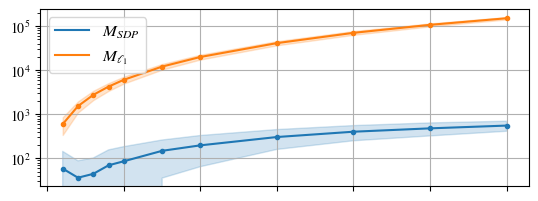

In [12]:
#figM = plt.figure(figsize=(4.2,1.75))
#figM = plt.figure(figsize=(6.3,2.55))
figM = plt.figure(figsize=(6.3,2.3))
ax = figM.add_subplot(1,1,1)
for i in range(len(M_strategies)):
    if plot_M[i]:
        ax.plot(data.bvars, avg_M[:,i], color = colors[i], label=M_strategies[i])
        ax.plot(data.bvars, avg_M[:,i], ".", color = colors[i])
        ax.fill_between(data.bvars, avg_M[:,i] - std_M[:,i], avg_M[:,i] + std_M[:,i],
        color = colors[i], alpha=.2)
ax.grid()
ax.set_yscale("log")
#ax.set_xticks(data.bvars)
ax.tick_params(labelbottom = False) 
#ax.tick_params(labelleft = False) 
#ax.set_yticks([10,100])
#ax.set_xlim(4.5, 25.5)
ax.legend(fontsize = 12, loc='upper left')
plt.show()

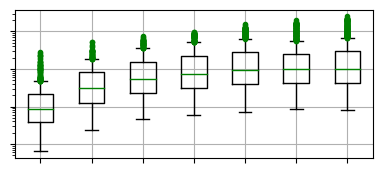

In [15]:
#ylim = 40
#figD = plt.figure(figsize=(4.2,1.75))
figD = plt.figure(figsize=(4.62,1.93))
ax = figD.add_subplot(1,1,1)
indexes_to_plot = list(np.arange(-7, 0))   # PO_part3_ra10_mult4
#indexes_to_plot = list(np.arange(1, 20,3)) # SPP_p25
#indexes_to_plot = list(np.arange(0, 24,3)) # NN_deg5
#ax.set_xlabel('Binary variables', fontsize = 16)
box_plot = ax.boxplot(np.swapaxes(data.gap_norm[indexes_to_plot,:,0]/data.gap_norm[indexes_to_plot,:,1], axis1=0, axis2=1),
            sym = '.g', labels = data.bvars[indexes_to_plot])
for median in box_plot['medians']:
    median.set_color('g')
ax.grid()
ax.tick_params(labelleft = False) 
ax.tick_params(labelbottom = False) 
ax.set_yscale("log")
#ax.set_ylim(0, ylim)
plt.show()

In [11]:
figM.savefig("../../../images/paper/Fig3/plot_short.pdf")
#figD.savefig("../../../images/paper/Fig2/D_PO_norm.pdf")